In [198]:
## ML IE2
## Yash Athawale 121B1B013
## Aditya Agre 121B1B006
## Vedant Bijwe 121B1B024
## Dataset : https://github.com/adityaagre/Machine-Learning/blob/main/SOCIAL_MEDIA_FAKES.csv

In [199]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
from sklearn import svm

# Load the dataset
data = pd.read_csv("File1.csv")

## We are shuffling rows because cross validation score function probably does not do this by itself.
data = data.sample(frac = 1)

# Drop the 'isFake' column and rename 'Isfake' to 'target'
#data.drop(columns=['isFake'], inplace=True)
#data.rename(columns={'Isfake': 'target'})

# Separate features and target variable
y = data['Isfake']
X = data.drop(columns=['Isfake'])

## Cross Validation
num_folds = 5
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Finding the best k value using elbow method
k_list = []
acc_list = []
for i in range(1, 25, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model = KNeighborsClassifier(n_neighbors=k)
  score = cross_val_score(knn_model, X_scaled, y, cv=5)

  k_list.append(k)
  acc_list.append(score)
  print("Accuracy after considering ", k, " neighbours: ", score, np.average(score))

Accuracy after considering  1  neighbours:  [0.89121339 0.92050209 0.89539749 0.91631799 0.93697479] 0.9120811504518125
Accuracy after considering  3  neighbours:  [0.89121339 0.958159   0.90794979 0.93305439 0.92857143] 0.923789599521817
Accuracy after considering  5  neighbours:  [0.91213389 0.94979079 0.91213389 0.94142259 0.93697479] 0.9304911922928168
Accuracy after considering  7  neighbours:  [0.91631799 0.94560669 0.90376569 0.9539749  0.93277311] 0.9304876762420451
Accuracy after considering  9  neighbours:  [0.90376569 0.94142259 0.91213389 0.94979079 0.93277311] 0.9279772159909989
Accuracy after considering  11  neighbours:  [0.92050209 0.93305439 0.90794979 0.94560669 0.94117647] 0.9296578882599065
Accuracy after considering  13  neighbours:  [0.91631799 0.92468619 0.89958159 0.93723849 0.93697479] 0.9229598115396787
Accuracy after considering  15  neighbours:  [0.90376569 0.92468619 0.89958159 0.93723849 0.93697479] 0.9204493512886327
Accuracy after considering  17  neighb

In [200]:
print(k_list)
for i in acc_list:
    print(i)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.89121339 0.92050209 0.89539749 0.91631799 0.93697479]
[0.89121339 0.958159   0.90794979 0.93305439 0.92857143]
[0.91213389 0.94979079 0.91213389 0.94142259 0.93697479]
[0.91631799 0.94560669 0.90376569 0.9539749  0.93277311]
[0.90376569 0.94142259 0.91213389 0.94979079 0.93277311]
[0.92050209 0.93305439 0.90794979 0.94560669 0.94117647]
[0.91631799 0.92468619 0.89958159 0.93723849 0.93697479]
[0.90376569 0.92468619 0.89958159 0.93723849 0.93697479]
[0.90794979 0.92887029 0.89958159 0.93723849 0.94117647]
[0.90794979 0.93305439 0.89958159 0.94560669 0.93697479]
[0.90376569 0.93305439 0.89958159 0.94142259 0.93277311]
[0.90376569 0.92887029 0.89958159 0.92887029 0.93277311]


In [201]:
## Finding average accuracy across cross validation folds

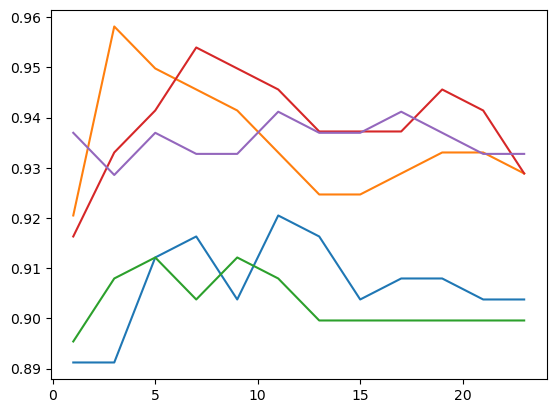

In [202]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array(k_list)
ypoints = np.array(acc_list)

plt.plot(xpoints, ypoints)
plt.show()

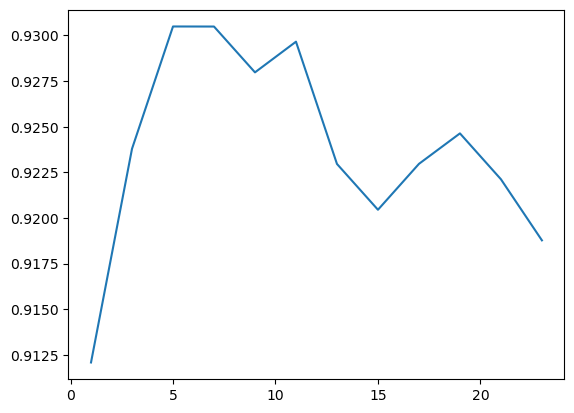

In [203]:
xpoints = np.array(k_list)
ypoints = np.array([np.average(i) for i in acc_list])
plt.plot(xpoints, ypoints)
plt.show()

In [204]:
print(xpoints)
print(ypoints)

[ 1  3  5  7  9 11 13 15 17 19 21 23]
[0.91208115 0.9237896  0.93049119 0.93048768 0.92797722 0.92965789
 0.92295981 0.92044935 0.92296333 0.92463345 0.92211948 0.9187722 ]


In [205]:
## Best accuracy at k = 3
knn_model = KNeighborsClassifier(n_neighbors=3)
score_knn_k = cross_val_score(knn_model, X_scaled, y, cv=5)
print(score_knn_k)

[0.89121339 0.958159   0.90794979 0.93305439 0.92857143]


In [206]:
knn_avg_acc = np.average(score_knn_k)
print(knn_avg_acc)

0.923789599521817


In [207]:
knn_model.fit(X_scaled, y)

KNeighborsClassifier(n_neighbors=3)

In [208]:
knn_model.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [209]:
k_list_weighted = []
acc_list_weighted = []

for i in range(1, 25, 2):

  # Making the KNN model
  k = i  # Number of neighbors
  knn_model_weighted = KNeighborsClassifier(n_neighbors=k, weights = 'distance')
  score_weighted = cross_val_score(knn_model_weighted, X_scaled, y, cv=5)

  k_list_weighted.append(k)
  acc_list_weighted.append(score_weighted)
  print("Accuracy after considering ", k, " neighbours: ", score_weighted, np.average(score_weighted))

Accuracy after considering  1  neighbours:  [0.89121339 0.92050209 0.89539749 0.91631799 0.93697479] 0.9120811504518125
Accuracy after considering  3  neighbours:  [0.89121339 0.9539749  0.90376569 0.92050209 0.92857143] 0.919605499103407
Accuracy after considering  5  neighbours:  [0.91631799 0.94560669 0.91213389 0.92887029 0.93697479] 0.9279807320417707
Accuracy after considering  7  neighbours:  [0.91631799 0.94142259 0.90794979 0.94560669 0.92857143] 0.927973699940227
Accuracy after considering  9  neighbours:  [0.91213389 0.93305439 0.90376569 0.94979079 0.93277311] 0.9263035758236349
Accuracy after considering  11  neighbours:  [0.91213389 0.92887029 0.89958159 0.93305439 0.93697479] 0.9221229914559966
Accuracy after considering  13  neighbours:  [0.91631799 0.92468619 0.89539749 0.94142259 0.93697479] 0.9229598115396787
Accuracy after considering  15  neighbours:  [0.90794979 0.92887029 0.89958159 0.94560669 0.94117647] 0.9246369677578145
Accuracy after considering  17  neighbo

In [210]:
print(k_list_weighted)
for i in acc_list_weighted:
    print(i)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.89121339 0.92050209 0.89539749 0.91631799 0.93697479]
[0.89121339 0.9539749  0.90376569 0.92050209 0.92857143]
[0.91631799 0.94560669 0.91213389 0.92887029 0.93697479]
[0.91631799 0.94142259 0.90794979 0.94560669 0.92857143]
[0.91213389 0.93305439 0.90376569 0.94979079 0.93277311]
[0.91213389 0.92887029 0.89958159 0.93305439 0.93697479]
[0.91631799 0.92468619 0.89539749 0.94142259 0.93697479]
[0.90794979 0.92887029 0.89958159 0.94560669 0.94117647]
[0.90376569 0.92468619 0.90376569 0.94560669 0.94117647]
[0.90794979 0.92887029 0.89958159 0.94560669 0.93697479]
[0.89958159 0.92887029 0.89958159 0.94142259 0.93697479]
[0.89958159 0.93305439 0.90376569 0.94142259 0.93277311]


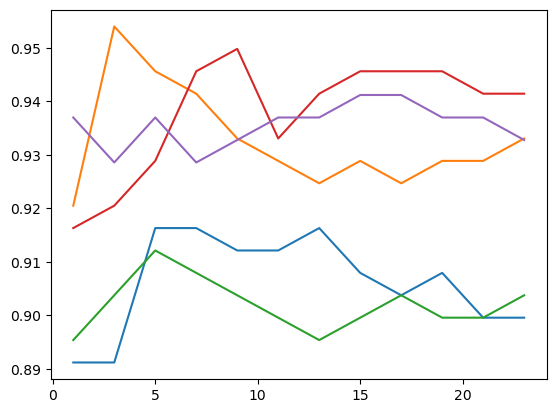

In [211]:
xpoints = np.array(k_list_weighted)
ypoints = np.array(acc_list_weighted)

plt.plot(xpoints, ypoints)
plt.show()

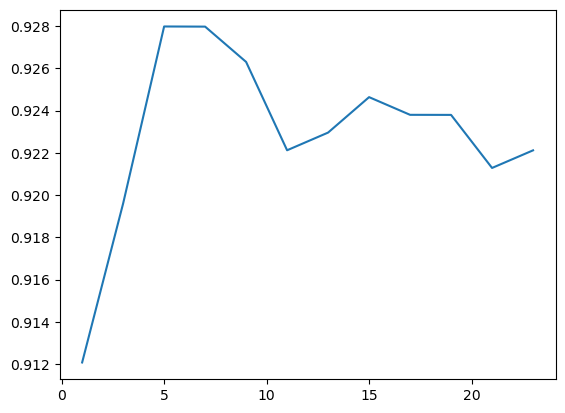

In [212]:
## Average accuracy for each value of k across cross validations
xpoints = np.array(k_list_weighted)
averaged_list_per_k_weighted = [np.average(i) for i in acc_list_weighted]
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [213]:
print(k_list_weighted)
print(averaged_list_per_k_weighted)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23]
[0.9120811504518125, 0.919605499103407, 0.9279807320417707, 0.927973699940227, 0.9263035758236349, 0.9221229914559966, 0.9229598115396787, 0.9246369677578145, 0.9238001476741324, 0.9237966316233607, 0.9212861713723146, 0.9221194754052249]


In [214]:
## Best accuracy at k = 5
knn_model_weighted = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
score_knn_k_weighted = cross_val_score(knn_model, X_scaled, y, cv=5)
print(score_knn_k_weighted)

[0.89121339 0.958159   0.90794979 0.93305439 0.92857143]


In [215]:
knn_weighted_avg_acc = np.average(score_knn_k_weighted)
print(knn_weighted_avg_acc*100)

92.3789599521817


In [216]:
knn_model_weighted.fit(X_scaled, y)

KNeighborsClassifier(weights='distance')

In [217]:
knn_model_weighted.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [218]:
## Therefore best performance is shown by using 3 neighbours.

In [220]:
## Using Logistic regression

# import the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# LogisticRegression
LR_object = LogisticRegression(random_state=42)
scores = cross_val_score(LR_object, X_scaled, y, cv=5)
print(scores)

[0.93723849 0.958159   0.91631799 0.9623431  0.94537815]


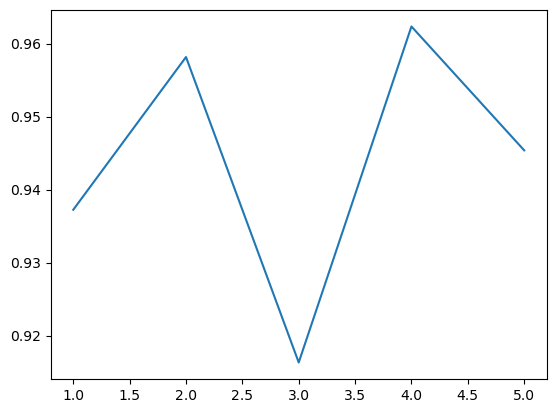

In [221]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [222]:
LR_average_acc = np.average(score)
print("Logistic Regression model accuracy (in %):", LR_average_acc)

Logistic Regression model accuracy (in %): 0.9187721950704969


In [223]:
LR_object.fit(X_scaled, y)

LogisticRegression(random_state=42)

In [224]:
LR_object.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [225]:
## SVM

In [226]:
svm_object = svm.SVC(kernel='linear', C=1, random_state=42)
scores_svm = cross_val_score(svm_object, X_scaled, y, cv=5)
scores_svm

array([0.93305439, 0.958159  , 0.92468619, 0.958159  , 0.94957983])

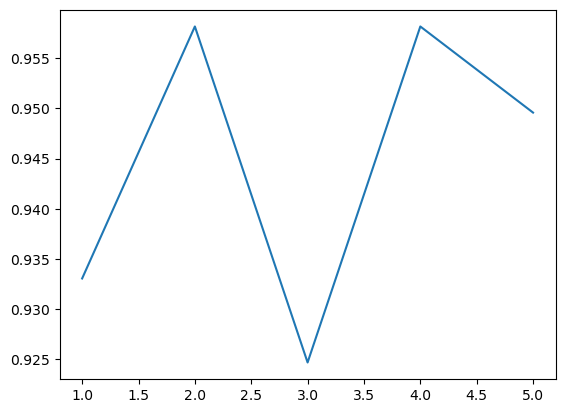

In [227]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores_svm
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [228]:
svm_avg_acc = np.average(scores_svm)
print("SVM model accuracy (in %):", svm_avg_acc*100)

SVM model accuracy (in %): 94.47276818677261


In [229]:
svm_object.fit(X_scaled, y)
svm_object.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['Yes'], dtype=object)

In [230]:
## Random Forest

In [231]:
from sklearn.ensemble import RandomForestClassifier

RF_object = RandomForestClassifier(random_state=42)
scores_RF = cross_val_score(RF_object, X_scaled, y, cv=5)
print(scores_RF)

[0.9539749  0.9665272  0.9623431  0.9623431  0.96638655]


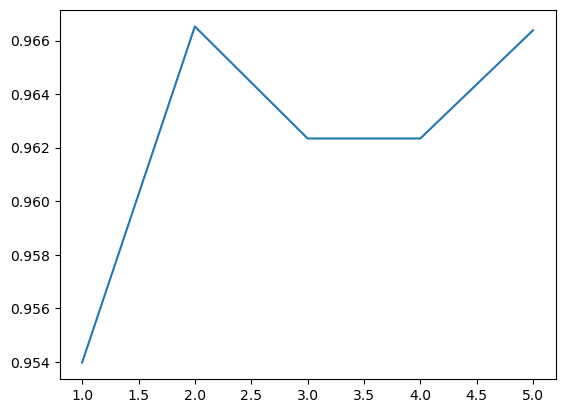

In [232]:
xpoints = np.array([1,2,3,4,5])
averaged_list_per_k_weighted = scores_RF
ypoints = np.array(averaged_list_per_k_weighted)

plt.plot(xpoints, ypoints)
plt.show()

In [233]:
rf_avg_acc = np.average(scores_RF)
print("Random Forest model sccuracy is: ", rf_avg_acc*100)

Random Forest model sccuracy is:  96.23149678281354


In [234]:
RF_object.fit(X_scaled, y)

RandomForestClassifier(random_state=42)

In [235]:
RF_object.predict(np.array([[25, 1937, 0, 0, 1, 1, 0, 10]]))

array(['No'], dtype=object)

In [236]:
## Comparison:
print("Following are the accuracies found across various models. \nAll accuracies have been calculated after 5 fold cross validation.\n")
print("KNN accuracy: ", knn_avg_acc)
print("Weighted KNN accuracy: ", knn_weighted_avg_acc)
print("Logistic Regression accuracy: ", LR_average_acc)
print("SVM accuracy: ", svm_avg_acc)
print("Random Forest accuracy: ", rf_avg_acc)

Following are the accuracies found across various models. 
All accuracies have been calculated after 5 fold cross validation.

KNN accuracy:  0.923789599521817
Weighted KNN accuracy:  0.923789599521817
Logistic Regression accuracy:  0.9187721950704969
SVM accuracy:  0.9447276818677262
Random Forest accuracy:  0.9623149678281354


In [237]:
results = {
    'Model' : ['KNN-3', 'Weighted-KNN-5', 'Logistic Regr.', 'SVM', 'Random Forest'],
    'Accuracies' : [knn_avg_acc*100, knn_weighted_avg_acc*100, LR_average_acc*100, svm_avg_acc*100, rf_avg_acc*100]
}

results_df = pd.DataFrame(results)
print(results_df)

            Model  Accuracies
0           KNN-3   92.378960
1  Weighted-KNN-5   92.378960
2  Logistic Regr.   91.877220
3             SVM   94.472768
4   Random Forest   96.231497


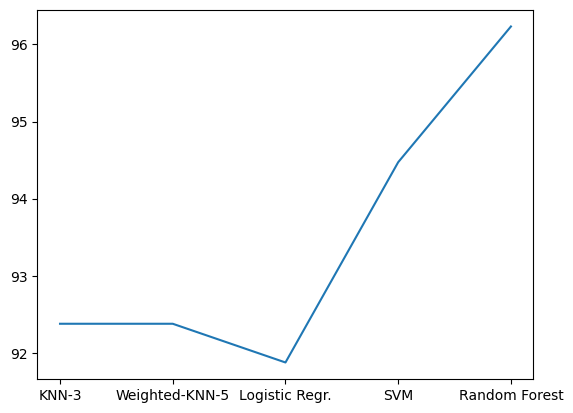

In [238]:
xpoints = results_df['Model']
ypoints = results_df['Accuracies']

plt.plot(xpoints, ypoints)
plt.show()